## About the dataset 

#### DOMAIN: Digital content management

#### CONTEXT: 
Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc.
are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a
classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.
#### DATA DESCRIPTION: 
Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of
19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or
approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and
the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is
marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
- 8240 "10s" blogs (ages 13-17),
- 8086 "20s" blogs(ages 23-27) and
- 2994 "30s" blogs (ages 33-47)

In [2]:
## Setting up environvenment on colabs 
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harmanpreetsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Imports 

import gc
gc.enable

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re
import nltk
import spacy
import string
import seaborn as sns

sns.set(rc={'figure.figsize':(15, 16)})
sns.set_theme(style="darkgrid") #// for version 11 :/

### Loading the dataset 

    First truncated then replace it with comple once protyping is complete 
    
    As the dataset is large, I am using fewer rows.

In [5]:
## load dataset and keep the orignal 

data_orignal = pd.read_csv('blogtext.csv', nrows = 50000,index_col=False)

# droping id and date columns
data_orignal.drop(labels=['id','date'], axis=1,inplace=True)

# the next step is to randomize the rows of the data
data_orignal = data_orignal.sample(frac=1).reset_index(drop=True)

gc.collect()

0

In [6]:
data_orignal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  50000 non-null  object
 1   age     50000 non-null  int64 
 2   topic   50000 non-null  object
 3   sign    50000 non-null  object
 4   text    50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [7]:
data_orignal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  50000 non-null  object
 1   age     50000 non-null  int64 
 2   topic   50000 non-null  object
 3   sign    50000 non-null  object
 4   text    50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


## Preprocessing

Some of the common text preprocessing / cleaning steps are:

    
    - [ ] remove unwanted space 
    - [ ] remove unwanted characters / remove Punctuation
    - [ ] remove Stopwords 
    - [ ] convert text to lowercase



In [8]:
## truncated dataset to start on rapid protyping to preprocessing 
df = data_orignal[["text"]]

In [9]:
df[:5]

,text
0,"Not even sure. Well, dumb as..."
1,Becky has a blog! Becky has a blog! Sor...
2,NO-one has blooged today! wOW! i'M ...
3,"My tastes in music vary, but only s..."
4,"Saturday December 14, 2002 I didn't ..."


In [10]:
pd.options.mode.chained_assignment = None
df['text'] = df[['text']]
df["text"] = df["text"].astype(str)



### Lower Casing

Lower casing is a common text preprocessing technique. The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.

This is more helpful for text featurization techniques like frequency, tfidf as it helps to combine the same words together thereby reducing the duplication and get correct counts / tfidf values.

This may not be helpful when we do tasks like Part of Speech tagging (where proper casing gives some information about Nouns and so on) and Sentiment Analysis (where upper casing refers to anger and so on)

By default, lower casing is done my most of the modern day vecotirzers and tokenizers like [sklearn TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and [Keras Tokenizer](https://keras.io/preprocessing/text/). So we need to set them to false as needed depending on our use case.


In [11]:
df["text_lower"] = df["text"].str.lower()
df.head()



,text,text_lower
0,"Not even sure. Well, dumb as...","not even sure. well, dumb as..."
1,Becky has a blog! Becky has a blog! Sor...,becky has a blog! becky has a blog! sor...
2,NO-one has blooged today! wOW! i'M ...,no-one has blooged today! wow! i'm ...
3,"My tastes in music vary, but only s...","my tastes in music vary, but only s..."
4,"Saturday December 14, 2002 I didn't ...","saturday december 14, 2002 i didn't ..."



### Removal of Punctuations

One another common text preprocessing technique is to remove the punctuations from the text data. This is again a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

We also need to carefully choose the list of punctuations to exclude depending on the use case. For example, the string.punctuation in python contains the following punctuation symbols

!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

We can add or remove more punctuations as per our need.


In [13]:
# df.drop(["text_lower"], axis=1, inplace=True)

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','',PUNCT_TO_REMOVE))
                                        
df["text_wo_punctuation"] = df["text_lower"].apply(lambda text: remove_punctuation(text))
df.head()

,text,text_lower,text_wo_punctuation
0,"Not even sure. Well, dumb as...","not even sure. well, dumb as...",not even sure well dumb ass ...
1,Becky has a blog! Becky has a blog! Sor...,becky has a blog! becky has a blog! sor...,becky has a blog becky has a blog sorry...
2,NO-one has blooged today! wOW! i'M ...,no-one has blooged today! wow! i'm ...,noone has blooged today wow im the ...
3,"My tastes in music vary, but only s...","my tastes in music vary, but only s...",my tastes in music vary but only sl...
4,"Saturday December 14, 2002 I didn't ...","saturday december 14, 2002 i didn't ...",saturday december 14 2002 i didnt go...



### Removal of stopwords

Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.

These stopword lists are already compiled for different languages and we can safely use them. For example, the stopword list for english language from the nltk package can be seen below.


In [16]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

gc.collect()

7

In [17]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


Pipeliining all the above steps :

In [18]:
## The output looks okay , some spacing adjustment would do wonders 

# Pipeline the pre-processing 
def clean_text(text):
    text = text.strip()
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = text.lower()
    return text
data_orignal["text"] = data_orignal["text"].map(lambda text : clean_text(text))

In [19]:
gc.collect()

data_orignal.head()

,gender,age,topic,sign,text
0,female,25,indUnk,Aquarius,not even sure well dumb ass j trying get ahold...
1,male,17,Student,Cancer,becky blog becky blog sorry good evening morta...
2,female,17,Student,Capricorn,noone blooged today wow im the first whooohoooo
3,female,17,Student,Capricorn,my tastes music vary slightly i like kinds roc...
4,female,24,indUnk,Libra,saturday december 14 2002 i didnt go work toda...


## EDA 


After cleaning the text , let's have some idea about the dataset 

In [20]:
data_orignal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  50000 non-null  object
 1   age     50000 non-null  int64 
 2   topic   50000 non-null  object
 3   sign    50000 non-null  object
 4   text    50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [21]:
pd.set_option('display.max_colwidth', 50)
data_orignal.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,female,male,female,female,female,female,male,male,male,female
age,25,17,17,17,24,24,36,36,15,26
topic,indUnk,Student,Student,Student,indUnk,indUnk,Fashion,Fashion,Student,indUnk
sign,Aquarius,Cancer,Capricorn,Capricorn,Libra,Libra,Aries,Aries,Gemini,Aquarius
text,not even sure well dumb ass j trying get ahold...,becky blog becky blog sorry good evening morta...,noone blooged today wow im the first whooohoooo,my tastes music vary slightly i like kinds roc...,saturday december 14 2002 i didnt go work toda...,its nice icky outside great way start weekend ...,hal i well way sunny phoenix february why stay...,i think americans read seymour hersh articles ...,heres second ten minute turn computer i active...,long live aquarians happy 26th birthday patric...


In [22]:
data_orignal.isnull().any().any() 

False

In [23]:
data_orignal.describe(include = [np.number]).T


,count,mean,std,min,25%,50%,75%,max
age,50000.0,24.36214,7.982836,13.0,17.0,24.0,27.0,48.0


In [24]:
print(data_orignal.age.value_counts())

17    6859
24    5746
23    5518
16    4156
27    4094
15    3508
35    3365
26    2869
25    2837
14    2043
36    1985
34    1886
33    1654
13     745
39     412
41     394
46     330
48     318
37     310
47     206
38     196
40     192
43     150
42      96
45      93
44      38
Name: age, dtype: int64


In [25]:
data_orignal.describe(include = [np.object]).T



##  we can convert ["gender", "topic", "sign"] as catagorical features 

/var/folders/3_/y3xs4ypx57l_ztf4td9z3tfw0000gn/T/ipykernel_60390/2323571198.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_orignal.describe(include = [np.object]).T


,count,unique,top,freq
gender,50000,2,male,25815
topic,50000,40,indUnk,17560
sign,50000,12,Aries,7795
text,50000,49038,,193


In [26]:
## let's do some memory analysis for dataframe and try reducing whenever possible

orignal_mem = data_orignal.memory_usage(deep=True)

In [27]:
orignal_mem


Index          128
gender     3098370
age         400000
topic      3246913
sign       3170411
text      43401758
dtype: int64

In [28]:
data_orignal.gender.value_counts()

male      25815
female    24185
Name: gender, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

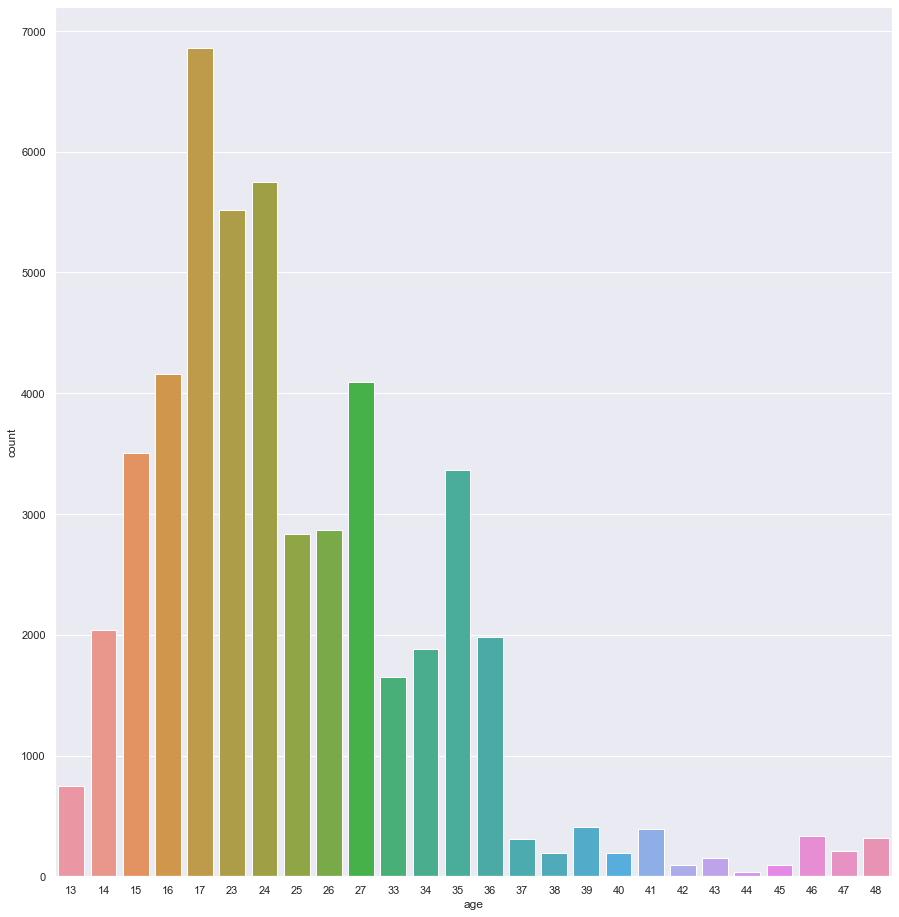

In [29]:
sns.countplot(x="age", data=data_orignal)

<AxesSubplot:xlabel='age', ylabel='count'>

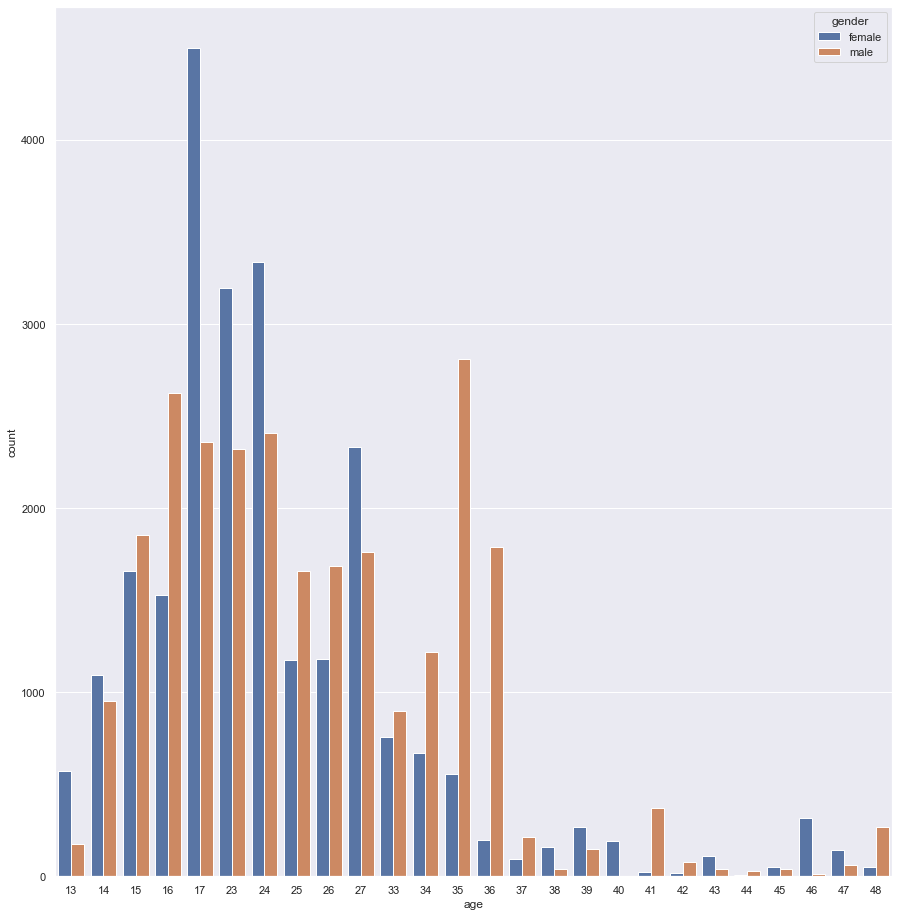

In [30]:
sns.countplot(x="age", hue="gender", data=data_orignal)

<AxesSubplot:xlabel='topic', ylabel='count'>

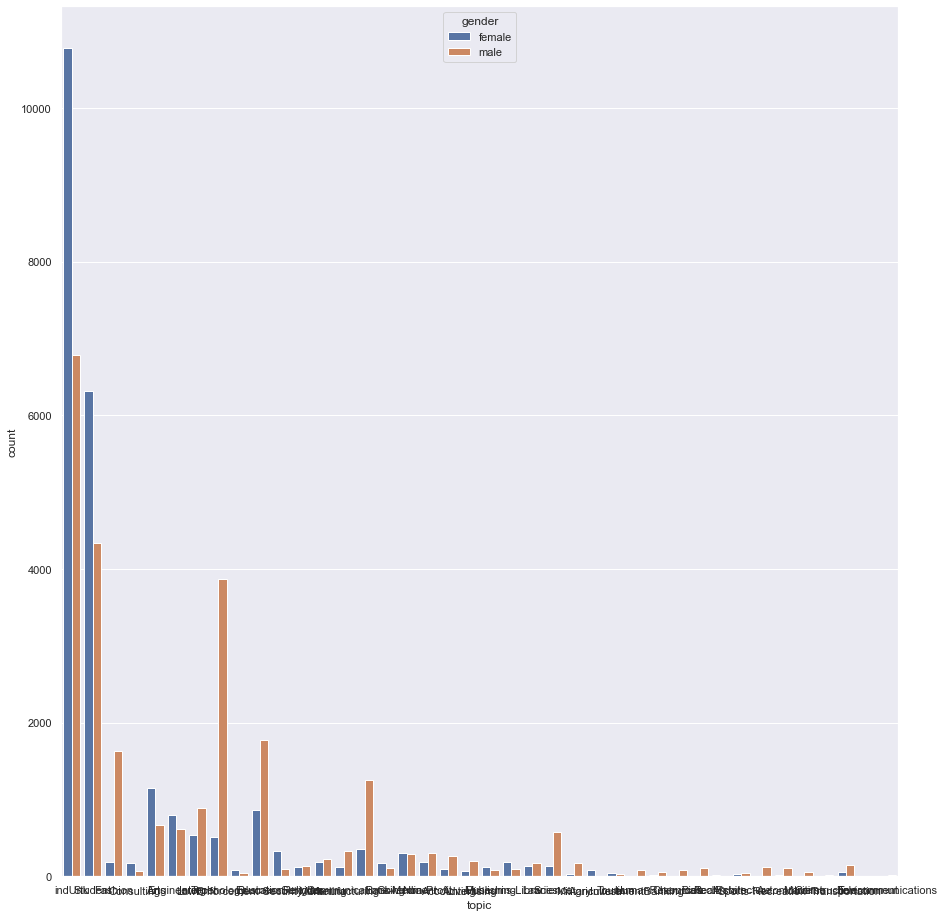

In [31]:
sns.countplot(x="topic", hue="gender", data=data_orignal)

### Merge labels for multi-label classification problem 

       Label columns to merge : ["gender", "age", "topic", "sign"]
       
       
       Reduce dataset to 
           dataset --> dataset[text, labels]
       

In [32]:
data_orignal["age"] = data_orignal["age"].astype(str)
data_orignal["labels"] = data_orignal.apply(lambda col :
                            [col["gender"],col["age"],col["topic"],col["sign"]],axis =1)

In [33]:
data_orignal.drop(columns=["gender","age","sign","topic"],axis =1, inplace = True)
gc.collect()

25

In [34]:
data_orignal.head(10)

,text,labels
0,not even sure well dumb ass j trying get ahold...,"[female, 25, indUnk, Aquarius]"
1,becky blog becky blog sorry good evening morta...,"[male, 17, Student, Cancer]"
2,noone blooged today wow im the first whooohoooo,"[female, 17, Student, Capricorn]"
3,my tastes music vary slightly i like kinds roc...,"[female, 17, Student, Capricorn]"
4,saturday december 14 2002 i didnt go work toda...,"[female, 24, indUnk, Libra]"
5,its nice icky outside great way start weekend ...,"[female, 24, indUnk, Libra]"
6,hal i well way sunny phoenix february why stay...,"[male, 36, Fashion, Aries]"
7,i think americans read seymour hersh articles ...,"[male, 36, Fashion, Aries]"
8,heres second ten minute turn computer i active...,"[male, 15, Student, Gemini]"
9,long live aquarians happy 26th birthday patric...,"[female, 26, indUnk, Aquarius]"


### Create train and test dataset

    Let's create a simple train and test dataset then create a cross validation too

In [35]:
from sklearn.model_selection import train_test_split

X = data_orignal.text
y = data_orignal.labels

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=42,
                                                   test_size = 0.1,
                                                  shuffle = True)

In [36]:
print("shape of training set :", X_train.shape)
print("shape of test set :", X_test.shape)

gc.collect()

shape of training set : (45000,)
shape of test set : (5000,)


0

### Vectorizing the features 

    1. Bag of words 
    2. TfIDF
    
    
    
  #### Counte Vectorizer on BoW 
  

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

ctv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 3), stop_words = 'english')

corpus = list(X_train)+list(X_test)
gc.collect()

0

In [40]:
ctv.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 3), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [41]:
# gc.collect()
xtrain_ctv = ctv.transform(X_train)


In [42]:
# gc.collect()
xtest_ctv = ctv.transform(X_test)

In [43]:
print(len(ctv.vocabulary_))

7347763


In [44]:
ctv.get_feature_names()[:10]

['0',
 '0 0',
 '0 0 0',
 '0 0 1',
 '0 0 draw',
 '0 0 h',
 '0 0 italy',
 '0 0 o',
 '0 0 switzerland',
 '0 0 theos']

####  TF-IDF (Term Frequency - Inverse Document Frequency)

In [38]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')


# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(X_train) + list(X_test))
xtrain_tfv =  tfv.transform(X_train) 
xvalid_tfv = tfv.transform(X_test)


gc.collect()

0

### Create a dictionary to get the count of every label 
    The key will be label name and value will be the total count of the label. Check below image for reference

In [46]:
label_counts=dict()

for labels in data_orignal.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1
        
label_counts


# gc.collect()

{'13': 745,
 '14': 2043,
 '15': 3508,
 '16': 4156,
 '17': 6859,
 '23': 5518,
 '24': 5746,
 '25': 2837,
 '26': 2869,
 '27': 4094,
 '33': 1654,
 '34': 1886,
 '35': 3365,
 '36': 1985,
 '37': 310,
 '38': 196,
 '39': 412,
 '40': 192,
 '41': 394,
 '42': 96,
 '43': 150,
 '44': 38,
 '45': 93,
 '46': 330,
 '47': 206,
 '48': 318,
 'Accounting': 364,
 'Advertising': 273,
 'Agriculture': 78,
 'Aquarius': 4784,
 'Architecture': 70,
 'Aries': 7795,
 'Arts': 1817,
 'Automotive': 116,
 'Banking': 283,
 'Biotech': 101,
 'BusinessServices': 416,
 'Cancer': 4589,
 'Capricorn': 3819,
 'Chemicals': 75,
 'Communications-Media': 1603,
 'Construction': 28,
 'Consulting': 243,
 'Education': 2646,
 'Engineering': 1402,
 'Environment': 6,
 'Fashion': 1805,
 'Gemini': 2558,
 'Government': 599,
 'HumanResources': 79,
 'Internet': 1420,
 'InvestmentBanking': 85,
 'Law': 308,
 'LawEnforcement-Security': 125,
 'Leo': 3904,
 'Libra': 4378,
 'Manufacturing': 441,
 'Maritime': 54,
 'Marketing': 414,
 'Military': 194,
 '

### Transform the labels


    Transform between iterable of iterables and a multilabel format
    
    As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn a. Convert your train and test labels using MultiLabelBinarizer

In [47]:
from sklearn.preprocessing import MultiLabelBinarizer

# Transform between iterable of iterables and a multilabel format
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))


y_train = binarizer.fit_transform(y_train)
y_test = binarizer.transform(y_test)

In [48]:
y_train


array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

### Multi-Label Classification Techniques

    Most traditional learning algorithms are developed for single-label classification problems. Therefore a lot of approaches in the literature transform the multi-label problem into multiple single-label problems, so that the existing single-label algorithms can be used.

### Accuracy metric 


Before diving into preparing models , let's settle with Metrics to measure prediction score

        1. Accuracy score
        2. F1 Score
        3. Average precision score : 
            3.1 Macro averaged precision: calculate precision for all classes
                individually and then average them
            3.2 Micro averaged precision: calculate class wise true positive and false
                positive and then use that to calculate overall precision
        4. Average recall score



In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))

### 1. OneVsRest

    Traditional two-class and multi-class problems can both be cast into multi-label ones by restricting each instance to have only one label. On the other hand, the generality of multi-label problems inevitably makes it more difficult to learn. An intuitive approach to solving multi-label problem is to decompose it into multiple independent binary classification problems (one per category).
    
    In an “one-to-rest” strategy, one could build multiple independent classifiers and, for an unseen instance, choose the class for which the confidence is maximized.
    
    The main assumption here is that the labels are mutually exclusive. You do not consider any underlying correlation between the classes in this method.
    
    

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'),
                    n_jobs=-1)),])
LogReg_pipeline.fit(xtrain_ctv, y_train)

Y_predicted_oneVsRest = LogReg_pipeline.predict(xtest_ctv)



##### To Try :
 1. Bianry Relevance
 2. Classifier Chains
 3. Label Powerset 
 4. Adapted Algorithm
 

In [51]:
display_metrics_micro(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.0022
F1 score: Micro 0.24673046251993624
Average precision score: Micro 0.13648582677165355
Average recall score: Micro 0.1547


In [52]:
display_metrics_macro(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.0022
F1 score: Macro 0.019446957520449178
Average recall score: MAcro 0.01754240529598053


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
display_metrics_weighted(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.0022
F1 score: weighted 0.15633819410458452


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score: weighted 0.23267366534151193
Average recall score: weighted 0.1547


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Let's check for any 5 inputs and there predicted labels
Print true label and predicted label for any five examples


In [54]:
import random 

def print_predicted(y_predicted, y_test = y_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print(binarizer.inverse_transform(y_predicted)[k])
        print(binarizer.inverse_transform(y_test)[k])
        print("=================x==================x================x==========")
                
                 
        

In [56]:
print_predicted(y_predicted=Y_predicted_oneVsRest,y_test=y_test, n= 10)

[3584, 3761, 1351, 3503, 4485, 40, 3105, 718, 4185, 3837]
('female',)
('23', 'Publishing', 'Sagittarius', 'male')
=================x==================x================x==========
('female',)
('17', 'Pisces', 'Student', 'female')
=================x==================x================x==========
('female',)
('23', 'Marketing', 'Scorpio', 'male')
=================x==================x================x==========
('female',)
('27', 'Taurus', 'female', 'indUnk')
=================x==================x================x==========
('female',)
('17', 'Capricorn', 'Student', 'female')
=================x==================x================x==========
('male',)
('26', 'Internet', 'Taurus', 'female')
=================x==================x================x==========
('male',)
('16', 'Sagittarius', 'Student', 'male')
=================x==================x================x==========
('male',)
('27', 'Aquarius', 'Marketing', 'female')
=================x==================x================x==========
('female',)

In [55]:
print("-----------------------------EndofKernal----------------------------------------")

-----------------------------EndofKernal----------------------------------------


## Conclusion:

- As the size of the vocabulary increases, TfidfVectorizer would be better able to differentiate rare words and commonly occurring words while Countvectorizer would still give equal weight to all words which is undesirable. So, TfidfVectorizer will give you better performance than CountVectorizer as the size of the vocabulary increases
- The third one performs better in terms of Accuracy, Precision, F1 score, etc

## Project 2: Chat-bot

#### PROJECT OBJECTIVE: 
Design a python based interactive semi - rule based chatbot which can do the following:
1. Start chat session with greetings and ask what the user is looking for. [5 Marks]
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus. [10 Marks]
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it. [5 Marks]

### Importing Libraries

In [39]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
from keras.models import load_model

# create an object of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# importing the GL Bot corpus file for pre-processing

words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open("GL+Bot.json").read()
intents = json.loads(data_file)

### Data Pre-Processing

In [40]:
# Preprocessing the json data and tokenization
nltk.download('punkt')
nltk.download('wordnet')
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harmanpreetsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harmanpreetsingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
# Lemmatize, lower each word and remove duplicates

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# sort classes
classes = sorted(list(set(classes)))

# documents = combination between patterns and intents
print (len(documents), "documents")

# classes = intents
print (len(classes), "classes", classes)

# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

# creating a pickle file to store the Python objects which we will use while predicting
pickle.dump(words,open('words.pkl','wb')) 
pickle.dump(classes,open('classes.pkl','wb'))

128 documents
8 classes ['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']
158 unique lemmatized words ['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'of', 'olympus', 'olypus', 'on', 'online', 'operation', 'opertions', 'otimi

### Creating Training Data

In [42]:
# create our training data
training = []

# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
   
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

# shuffle features and converting it into numpy arrays
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

print("Training data created")

Training data created


### Creating NN Model

In [43]:
# Create NN model to predict the responses
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. 
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot.h5', hist) # we will pickle this model to use in the future
print("\n")
print("*"*50)
print("\nModel Created Successfully!")

Epoch 1/200


2022-06-26 20:33:40.635715: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


26/26 [==============================] - 0s 909us/step - loss: 2.0948 - accuracy: 0.1719
Epoch 2/200
26/26 [==============================] - 0s 811us/step - loss: 1.9268 - accuracy: 0.2812
Epoch 3/200
26/26 [==============================] - 0s 712us/step - loss: 1.8165 - accuracy: 0.2656
Epoch 4/200
26/26 [==============================] - 0s 814us/step - loss: 1.7731 - accuracy: 0.3047
Epoch 5/200
26/26 [==============================] - 0s 706us/step - loss: 1.6634 - accuracy: 0.3828
Epoch 6/200
26/26 [==============================] - 0s 714us/step - loss: 1.6115 - accuracy: 0.4141
Epoch 7/200
26/26 [==============================] - 0s 890us/step - loss: 1.5160 - accuracy: 0.4375
Epoch 8/200
26/26 [==============================] - 0s 770us/step - loss: 1.3285 - accuracy: 0.6016
Epoch 9/200
26/26 [==============================] - 0s 731us/step - loss: 1.2799 - accuracy: 0.6094
Epoch 10/200
26/26 [==============================] - 0s 871us/step - loss: 1.2066 - accuracy: 0.5781
E

26/26 [==============================] - 0s 720us/step - loss: 0.0285 - accuracy: 1.0000
Epoch 82/200
26/26 [==============================] - 0s 726us/step - loss: 0.0366 - accuracy: 0.9922
Epoch 83/200
26/26 [==============================] - 0s 736us/step - loss: 0.0455 - accuracy: 0.9922
Epoch 84/200
26/26 [==============================] - 0s 730us/step - loss: 0.0451 - accuracy: 0.9766
Epoch 85/200
26/26 [==============================] - 0s 707us/step - loss: 0.0240 - accuracy: 1.0000
Epoch 86/200
26/26 [==============================] - 0s 693us/step - loss: 0.1096 - accuracy: 0.9688
Epoch 87/200
26/26 [==============================] - 0s 710us/step - loss: 0.0410 - accuracy: 0.9922
Epoch 88/200
26/26 [==============================] - 0s 721us/step - loss: 0.0362 - accuracy: 0.9922
Epoch 89/200
26/26 [==============================] - 0s 705us/step - loss: 0.0423 - accuracy: 0.9922
Epoch 90/200
26/26 [==============================] - 0s 711us/step - loss: 0.0248 - accuracy: 

26/26 [==============================] - 0s 689us/step - loss: 0.0189 - accuracy: 1.0000
Epoch 161/200
26/26 [==============================] - 0s 699us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 162/200
26/26 [==============================] - 0s 693us/step - loss: 0.0148 - accuracy: 0.9922
Epoch 163/200
26/26 [==============================] - 0s 689us/step - loss: 0.0145 - accuracy: 1.0000
Epoch 164/200
26/26 [==============================] - 0s 709us/step - loss: 0.0103 - accuracy: 1.0000
Epoch 165/200
26/26 [==============================] - 0s 720us/step - loss: 0.0136 - accuracy: 1.0000
Epoch 166/200
26/26 [==============================] - 0s 695us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 167/200
26/26 [==============================] - 0s 709us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 168/200
26/26 [==============================] - 0s 707us/step - loss: 0.0165 - accuracy: 1.0000
Epoch 169/200
26/26 [==============================] - 0s 696us/step - loss: 0.0148 - a

### Repeating all the above steps and using the pickled model for the prediction of responses

In [44]:
# load the saved model file
model = load_model('chatbot.h5')
intents = json.loads(open("GL+Bot.json").read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [45]:
def clean_up_sentence(sentence):

    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words


# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence, words, show_details=True):

    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)

    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words) 
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
               
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):
   
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    error = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>error]
    
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

In [46]:
# function to get the response from the model

def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

# function to predict the class and get the response

def chatbot_response(text):
    ints = predict_class(text, model)
    res = getResponse(ints, intents)
    return res

In [47]:
# function to start the chat bot which will continue till the user type 'end'

def start_chat():
    print("Bot: This is Harman! Your Personal Assistant.\n\n")
    while True:
        inp = str(input()).lower()
        if inp.lower()=="end":
            break
        if inp.lower()== '' or inp.lower()== '*':
            print('Please re-phrase your query!')
            print("-"*50)
        else:
            print(f"Bot: {chatbot_response(inp)}"+'\n')
            print("-"*50)

## Chatting with BOT using the Command Line Option

In [48]:
# Starting the chat
start_chat()

Bot: This is Harman! Your Personal Assistant.


Hi, I have a question
Bot: Hello! how can i help you ?

--------------------------------------------------
not able to understand neural nets
Bot: Link: Neural Nets wiki

--------------------------------------------------
when are your hours of opertions
Bot: I am your virtual learning assistant

--------------------------------------------------
you did not help me
Bot: Tarnsferring the request to your PM

--------------------------------------------------
Thanks
Bot: I hope I was able to assist you, Good Bye

--------------------------------------------------
end
